# Import Packages and Mount Drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import itertools
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score
import random
!pip install weasyprint 
import PIL as pil
from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.inspection import permutation_importance
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


     |████████████████████████████████| 368kB 19.9MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 1.9MB 43.7MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp37-none-any.whl size=89548 sha256=69e9295be17362becca83be3a5562d61c7a26d0cfab3c7989e4921d54013a4ea
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Read Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CDA final project/data/train.csv")
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# Exploratory Data Analysis

- Create two tables of summary statistics for report.


In [ ]:
# summary statistics of our dataset
desc = data.describe()
df = pd.DataFrame(desc)
# split the dataframe into 2 tables for visibility
df_first_half = df.iloc[:, :8]
df_second_half = df.iloc[:, 8:15]
import weasyprint as wsp
# the following section is used for saving the dataframe into an image
# trim() defines the border of the image and removes background color and trims whitespace
# link1: https://stackoverflow.com/questions/10615901/trim-whitespace-using-pil
# link2 https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png
def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)

img_filepath_first_half = '/content/drive/MyDrive/CDA final project/data/table_1st_half.png'
img_filepath_second_half = '/content/drive/MyDrive/CDA final project/data/table_2nd_half.png'

css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')

html = wsp.HTML(string=df_first_half.to_html())
html.write_png(img_filepath_first_half, stylesheets=[css])
trim(img_filepath_first_half)

html = wsp.HTML(string=df_second_half.to_html())
html.write_png(img_filepath_second_half, stylesheets=[css])
trim(img_filepath_second_half)

In [ ]:
# display summary statistics dataframe
df

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# check for missing values
df = data.copy()
df.isna().sum()/(len(df))*100
df2 = pd.DataFrame(df.isna().sum()/(len(df))*100, columns=['Missing values (%)'])
df2.index.name = 'Variable'
sorted_df = df2.sort_values(by='Missing values (%)', ascending=False)
df_new = sorted_df.reset_index()

img_filepath2 = '/content/drive/MyDrive/CDA final project/data/missing_values.png'

html = wsp.HTML(string=df_new.to_html())
html.write_png(img_filepath2, stylesheets=[css])
trim(img_filepath2)
df_new


,Variable,Missing values (%)
0,glucose,8.967552
1,education,2.566372
2,BPMeds,1.297935
3,totChol,1.120944
4,cigsPerDay,0.648968
5,BMI,0.412979
6,heartRate,0.029499
7,id,0.000000
8,diaBP,0.000000
9,sysBP,0.000000


- Check unique values in our dataset

In [ ]:
# check unique values in our dataset
distinctCount = data.apply(lambda x: len(x.unique()))
print("Unique values in our dataset: \n")
display(distinctCount)

print("\nBinary variables: \n")
display(distinctCount[distinctCount == 2].index.values.tolist())


Unique values in our dataset: 



id                 3390
age                  39
education             5
sex                   2
is_smoking            2
cigsPerDay           33
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             241
sysBP               226
diaBP               142
BMI                1260
heartRate            69
glucose             133
TenYearCHD            2
dtype: int64


Binary variables: 



['sex',
 'is_smoking',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

- Handle categorical data
  - convert `sex` and `is_smoking` to binary values

In [ ]:
# change sex and is_smoking to binary var
data["sex"] = data.sex.apply(lambda x: 1 if x == "F" else 0)
data["is_smoking"] = data.is_smoking.apply(lambda x: 1 if x == "YES" else 0)

data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


- Correlation matrix

In [ ]:
corr = data.drop(columns=['id', 'TenYearCHD']).corr()
corr.style.background_gradient(cmap='Blues').set_precision(2)


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.00,-0.17,0.04,-0.21,-0.19,0.12,0.06,0.31,0.11,0.27,0.40,0.22,0.14,-0.00,0.12
education,-0.17,1.00,-0.03,0.03,0.01,-0.02,-0.03,-0.08,-0.05,-0.02,-0.14,-0.06,-0.13,-0.05,-0.04
sex,0.04,-0.03,1.00,-0.22,-0.33,0.04,0.01,-0.00,-0.01,0.07,0.04,-0.06,-0.09,0.12,0.01
is_smoking,-0.21,0.03,-0.22,1.00,0.77,-0.04,-0.04,-0.12,-0.05,-0.05,-0.15,-0.12,-0.17,0.06,-0.06
cigsPerDay,-0.19,0.01,-0.33,0.77,1.00,-0.04,-0.04,-0.08,-0.05,-0.02,-0.10,-0.07,-0.10,0.07,-0.07
BPMeds,0.12,-0.02,0.04,-0.04,-0.04,1.00,0.12,0.26,0.07,0.08,0.26,0.20,0.09,0.02,0.06
prevalentStroke,0.06,-0.03,0.01,-0.04,-0.04,0.12,1.00,0.07,0.01,-0.01,0.06,0.05,0.02,-0.02,0.02
prevalentHyp,0.31,-0.08,-0.00,-0.12,-0.08,0.26,0.07,1.00,0.08,0.16,0.70,0.61,0.30,0.15,0.09
diabetes,0.11,-0.05,-0.01,-0.05,-0.05,0.07,0.01,0.08,1.00,0.06,0.12,0.06,0.09,0.04,0.62
totChol,0.27,-0.02,0.07,-0.05,-0.02,0.08,-0.01,0.16,0.06,1.00,0.20,0.15,0.11,0.09,0.06


- Show highly correlated variables `(corr >= +-0.5)`

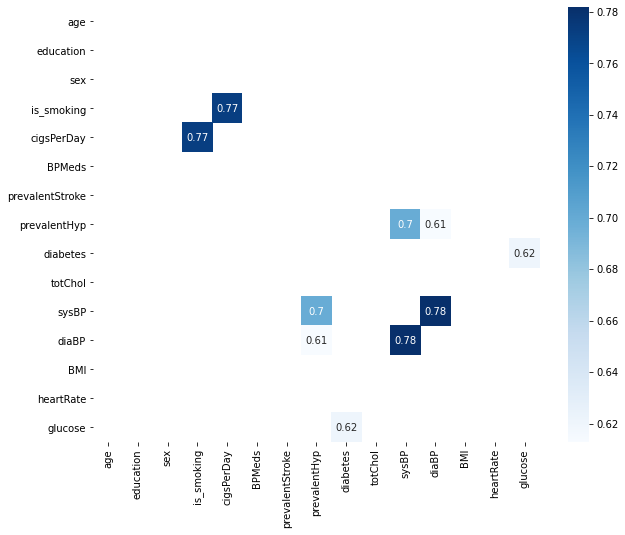

In [ ]:
filteredDf = corr[((corr >= .5) | (corr <= -.5)) & (corr !=1.000)]
plt.figure(figsize=(10,8))
sns.heatmap(filteredDf, annot=True, cmap="Blues")
plt.show()
plt.close()

- We can drop `id` column since it's not needed for our analysis
- Drop `is_smoking`since it is highly correlated with `cigsPerDay`

In [ ]:
# drop the id and is_smoking
data_for_modeling = data.drop(['id', 'is_smoking'], axis=1) #drop 'id' and `is_smoking`
data_for_modeling.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# Split the Data



*   Extract Validation set (20%)



In [ ]:
train_test, validation_set = train_test_split(data_for_modeling, test_size = 0.2, shuffle=True, random_state = 42)

# Extract Validation features
X_features_validation = validation_set.iloc[:,:-1]
y_feature_validation = validation_set.iloc[:,-1]

- Split Data into Train and Test before Scaling the Training

In [ ]:
# Extract features of train/test set

X_features = train_test.iloc[:,:-1]
y_feature = train_test.iloc[:,-1]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_feature, test_size=0.2, shuffle=True, random_state=42)

# Impute Missing Values Before Handling Outliers
- We will use `KNNImputer`. The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.

In [ ]:
# impute missing values using KNN
def KNN_imputation(data):
  from sklearn.impute import KNNImputer

  imputer = KNNImputer(n_neighbors=5)

  return imputer.fit_transform(data)

In [ ]:
X_train_imputed = KNN_imputation(X_train)
X_test_imputed = KNN_imputation(X_test)
X_validation_imputed = KNN_imputation(X_features_validation)

In [ ]:
# check X_train and X_test after data imputation
x_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_features.columns)
x_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_features.columns)
x_validation_imputed_df = pd.DataFrame(X_validation_imputed, columns=X_features.columns)
display(pd.DataFrame(X_train_imputed, columns=X_features.columns))

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,49.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,300.0,131.0,88.0,26.85,70.0,73.0
1,53.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0,108.5,73.0,26.55,54.0,73.0
2,53.0,2.0,0.0,43.0,0.0,0.0,0.0,0.0,220.0,119.0,75.0,26.28,82.0,67.0
3,58.0,1.0,0.0,20.0,0.0,0.0,1.0,0.0,192.0,143.0,98.0,29.01,90.0,68.0
4,45.0,2.0,1.0,15.0,0.0,0.0,0.0,0.0,222.0,95.0,58.0,21.68,75.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,41.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,197.0,121.0,84.0,23.07,80.0,79.2
2165,55.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,273.0,125.0,80.0,23.05,85.0,67.0
2166,44.0,4.0,1.0,10.0,0.0,0.0,0.0,0.0,170.0,107.0,70.5,19.28,63.0,85.2
2167,54.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,320.0,165.0,84.0,38.31,80.0,99.0


In [ ]:
# check dataFrame for missing values
print("x_train Missing Values per Category: \n")
x_train_imputed_df.isna().sum()/(len(x_train_imputed_df))*100

x_train Missing Values per Category: 



age                0.0
education          0.0
sex                0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
dtype: float64

In [ ]:
print("x_test Missing Values per Category: \n")
x_test_imputed_df.isna().sum()/(len(x_test_imputed_df))*100

x_test Missing Values per Category: 



age                0.0
education          0.0
sex                0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
dtype: float64

# Outlier Detection with Imputed Values

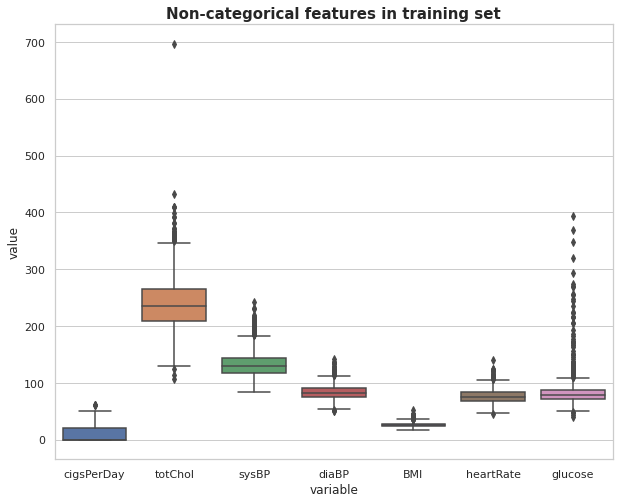

In [ ]:
# box plots for the x_train_imputed_df
sns.set_theme(style="whitegrid", font='sans-serif')
fig = plt.figure(figsize =(10, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(x_train_imputed_df[["cigsPerDay", "totChol","sysBP","diaBP","BMI","heartRate","glucose"]]))
plt.title("Non-categorical features in training set", size=15, weight='bold')
plt.savefig("/content/drive/MyDrive/CDA final project/data/box_plot_xtrain.png")
plt.show()
plt.close()

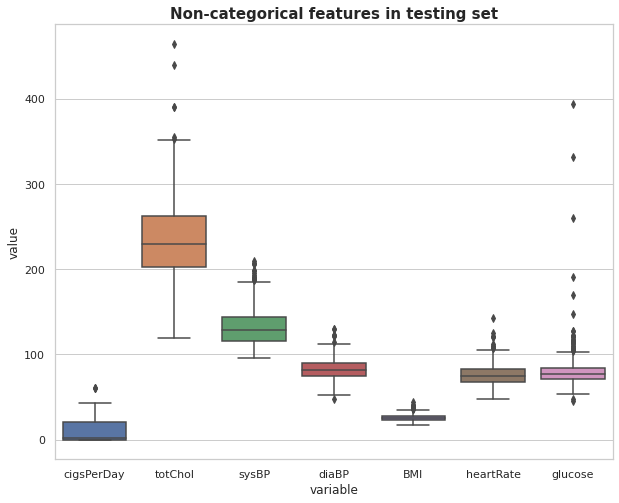

In [ ]:
# box plots for the x_test_imputed_df
fig = plt.figure(figsize =(10, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(x_test_imputed_df[["cigsPerDay", "totChol","sysBP","diaBP","BMI","heartRate","glucose"]]))
plt.title("Non-categorical features in testing set", size=15, weight='bold')
plt.savefig("/content/drive/MyDrive/CDA final project/data/box_plot_xtest.png")
plt.show()
plt.close()

- We will use `IQR (Inter Quartile Range)` Inter Quartile Range approach to finding the  outliers. IQR is the most commonly used and most trusted approach used in the research field.

- We will detect and remove outliers from each of the columns that have outliers. I decided to pursue this method instead of removing every row that has outliers because we really dont want to throw away valuable information from the rest of the features. *can look to reword on justification. could make sense to remove depending on the impact these rows have on prediction*

- We will remove the outliers from the columns in the boxplot then we will reconstruct our train/test X features dataset. We will end up with missing data after the reconstruction, so imputation after outlier removal is needed.

In [ ]:
# IQR, above upper and lower bounds
def quartiles_iqr(df, colname='BMI'):

  Q1 = np.percentile(df[colname], 25, interpolation = 'midpoint') 
  Q3 = np.percentile(df[colname], 75, interpolation = 'midpoint') 
  IQR = Q3 - Q1
  
  return Q1, Q3, IQR

def get_upper_lower_bounds(df, colname):
  Q1, Q3, IQR = quartiles_iqr(df, colname)

  # Above Upper bound
  upper = df[colname] >= (Q3 + 1.5 * IQR)

  # Below Lower bound
  lower = df[colname] <= (Q1 - 1.5 * IQR)

  return upper, lower

In [ ]:
# get all of the outlier indices per column in both x_train and x_test datasets

col_with_outliers = ["cigsPerDay", "totChol","sysBP","diaBP","BMI","heartRate","glucose"]

outlier_indices_train = {}
outlier_indices_test = {}

for col in col_with_outliers:
  upper_train, lower_train = get_upper_lower_bounds(x_train_imputed_df, col)
  upper_test, lower_test = get_upper_lower_bounds(x_test_imputed_df, col)
  indices_train = np.where(upper_train) + np.where(lower_train)
  indices_test = np.where(upper_test) + np.where(lower_test)
  outlier_indices_train[col] = indices_train
  outlier_indices_test[col] = indices_test

In [ ]:
# inspect outliers in BMI column
print("Outlier indices from X training data")
outlier_indices_train['BMI']

Outlier indices from X training data


(array([  93,  171,  235,  236,  357,  367,  385,  438,  478,  479,  545,
         567,  599,  688,  693,  714,  735,  743,  757,  782,  817,  825,
         845,  986, 1042, 1183, 1250, 1351, 1390, 1392, 1395, 1422, 1425,
        1431, 1456, 1517, 1564, 1711, 1724, 1748, 1780, 1845, 1926, 1971,
        1994, 2029, 2167]), array([], dtype=int64))

In [ ]:
print("Outlier indices from X testing data")
outlier_indices_test['BMI']

Outlier indices from X testing data


(array([ 45, 102, 132, 159, 201, 237, 250, 257, 298, 312, 340, 387, 392,
        461, 472, 476]), array([], dtype=int64))

# Outlier Removal

In [ ]:
# use the dictionaries from the previous section to remove outliers from those columns

# make copy of dataframes
X_train_no_outliers = x_train_imputed_df.copy()
X_test_no_outliers = x_test_imputed_df.copy()


X_train_no_outliers.describe()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000
mean,49.727063,1.955095,0.571692,8.971784,0.032089,0.006455,0.319502,0.028124,238.274228,132.967497,82.975565,25.842104,75.867497,82.311941
std,8.650460,0.997151,0.494948,11.877441,0.175647,0.080099,0.466391,0.165364,44.711415,21.853103,11.876958,4.019478,11.865907,23.514327
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,16.480000,45.000000,40.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,209.000000,117.500000,75.000000,23.100000,68.000000,72.000000
50%,49.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,129.000000,82.000000,25.380000,75.000000,78.000000
75%,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,70.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,696.000000,243.000000,142.500000,51.280000,140.000000,394.000000


In [ ]:
for col in col_with_outliers:
  X_train_no_outliers.loc[list(outlier_indices_train[col][0]), col] = np.NAN
  X_test_no_outliers.loc[list(outlier_indices_test[col][0]), col] = np.NAN

In [ ]:
# data info
X_train_no_outliers.info()
X_test_no_outliers.info()

print("=====================================================")
# check dataFrame for missing values
print(X_train_no_outliers.isna().sum()/(len(X_train_no_outliers))*100)
print("\n")
print(X_test_no_outliers.isna().sum()/(len(X_test_no_outliers))*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2169 non-null   float64
 1   education        2169 non-null   float64
 2   sex              2169 non-null   float64
 3   cigsPerDay       2160 non-null   float64
 4   BPMeds           2169 non-null   float64
 5   prevalentStroke  2169 non-null   float64
 6   prevalentHyp     2169 non-null   float64
 7   diabetes         2169 non-null   float64
 8   totChol          2138 non-null   float64
 9   sysBP            2103 non-null   float64
 10  diaBP            2132 non-null   float64
 11  BMI              2122 non-null   float64
 12  heartRate        2130 non-null   float64
 13  glucose          2059 non-null   float64
dtypes: float64(14)
memory usage: 237.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 14 columns):
 #   Colu

# Imputing Missing Values After Handling Outliers

In [ ]:
# impute missing values using knn imputer
X_train_no_outliers_imputed = KNN_imputation(X_train_no_outliers)
X_test_no_outliers_imputed = KNN_imputation(X_test_no_outliers)

In [ ]:
# check X_train and X_test after data imputation
x_train_no_outliers_imputed_df = pd.DataFrame(X_train_no_outliers_imputed, columns=X_features.columns)
x_test_no_outliers_imputed_df = pd.DataFrame(X_test_no_outliers_imputed, columns=X_features.columns)
display(pd.DataFrame(X_train_no_outliers_imputed, columns=X_features.columns))

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,49.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,300.0,131.0,88.0,26.850,70.0,73.0
1,53.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0,108.5,73.0,26.550,54.0,73.0
2,53.0,2.0,0.0,43.0,0.0,0.0,0.0,0.0,220.0,119.0,75.0,26.280,82.0,67.0
3,58.0,1.0,0.0,20.0,0.0,0.0,1.0,0.0,192.0,143.0,98.0,29.010,90.0,68.0
4,45.0,2.0,1.0,15.0,0.0,0.0,0.0,0.0,222.0,95.0,58.0,21.680,75.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,41.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,197.0,121.0,84.0,23.070,80.0,79.2
2165,55.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,273.0,125.0,80.0,23.050,85.0,67.0
2166,44.0,4.0,1.0,10.0,0.0,0.0,0.0,0.0,170.0,107.0,70.5,19.280,63.0,85.2
2167,54.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,320.0,165.0,84.0,25.686,80.0,99.0


In [ ]:
# check dataFrame for missing values
x_train_no_outliers_imputed_df.isna().sum()/(len(x_train_no_outliers_imputed_df))*100

age                0.0
education          0.0
sex                0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
dtype: float64

In [ ]:
x_test_no_outliers_imputed_df.isna().sum()/(len(x_test_no_outliers_imputed_df))*100

age                0.0
education          0.0
sex                0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
dtype: float64

# Scaling Data

We now scale both of the training datasets: with and without outliers

* With Outliers:

In [ ]:
# Define Scaler for Outliers
Scaler = StandardScaler()

# Scale the Independent Features in the Training Set
scaled_X_train_outliers = Scaler.fit_transform(x_train_imputed_df)

# Transform Test Set X variables
scaled_X_test_outliers = Scaler.transform(X_test_imputed)

# For eventual validation, use this scale on validation Set
#x_validation_outliers = validation_set.iloc[:,:-1]
x_validation_outliers = Scaler.transform(X_validation_imputed)
y_validation_outliers = validation_set.iloc[:,-1]

#print(pd.DataFrame(x_validation_outliers).info())

* Without Outliers:

In [ ]:
## Repeat above for Non outliers
Scaler = StandardScaler()

# Scale the Independent Features in the Training Set
scaled_X_train_no_outliers = Scaler.fit_transform(X_train_no_outliers_imputed)

# Transform Test Set X variables
scaled_X_test_no_outliers = Scaler.transform(X_test_imputed)

# Scale validation set
#x_validation_no_outliers = validation_set.iloc[:,:-1]
x_validation_no_outliers = Scaler.transform(X_validation_imputed)
y_validation_no_outliers = validation_set.iloc[:,-1]


# Ensure correct format
print(x_validation_no_outliers.shape)
print(x_validation_outliers.shape)

print('Shape of training set')
print(scaled_X_train_no_outliers.shape)
print(scaled_X_train_outliers.shape)

(678, 14)
(678, 14)
Shape of training set
(2169, 14)
(2169, 14)


# Balancing the data

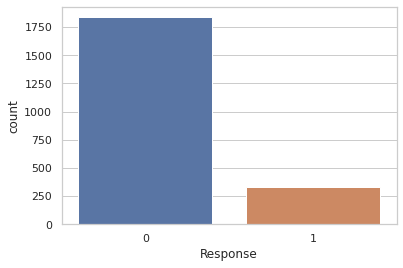

In [ ]:
y_train_viz = pd.DataFrame({'Response':y_train})
sns.countplot(x='Response',data=y_train_viz)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def balance_data(x_features, y_feature):
  from imblearn.combine import SMOTETomek
  from collections import Counter

  # split data into training and testing
  X = pd.DataFrame(x_features)
  y = pd.DataFrame(y_feature)

  # using SMOTE algorithm
  smk = SMOTETomek()

  X_res, y_res = smk.fit_sample(X, y)

  print('original y shape {}'.format(Counter(y)))
  print('Resampled y shape {}'.format(Counter(y_res)))

  return X_res, y_res

# Create balanced X and Y Train for No Outliers and With Outliers
x_train_no_outliers_balanced, y_train_no_outliers_balanced = balance_data(scaled_X_train_no_outliers, np.ravel(y_train))
x_train_outliers_balanced, y_train_outliers_balanced = balance_data(scaled_X_train_outliers, np.ravel(y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


original y shape Counter({0: 1})
Resampled y shape Counter({1: 1827, 0: 1827})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


original y shape Counter({0: 1})
Resampled y shape Counter({1: 1826, 0: 1826})


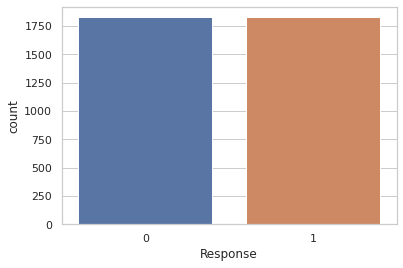

In [ ]:
# response variable after balancing the data
y_train_no_outliers_balanced_viz = pd.DataFrame({'Response':y_train_no_outliers_balanced})
sns.countplot(x='Response',data=y_train_no_outliers_balanced_viz)

# Feature Selection

## Elastic Net with permutation feature importance

In [ ]:
print(X_train.columns)

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')


Elastic Net on data with no outliers




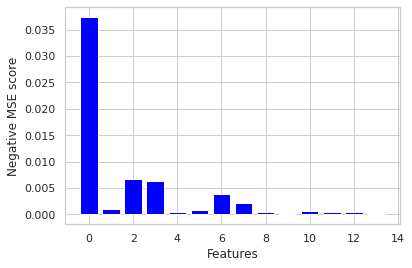


Elastic Net on data with outliers




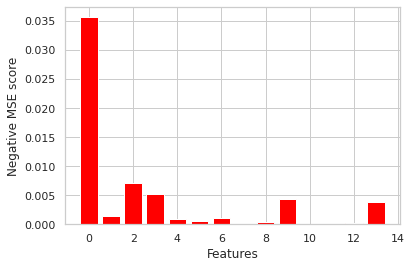

In [ ]:
def run_EN(x_train, y_train, mode='no_outliers'):

  # Train model and fit
  elastic_model = ElasticNetCV(cv=10, random_state=42).fit(x_train, y_train)

  # Begin code
  # perform permutation importance
  results = permutation_importance(elastic_model, x_train, y_train, scoring='neg_mean_squared_error')

  # get importance
  importance = results.importances_mean

  # summarize feature importance
  # for i,v in enumerate(importance):
  #   print('Feature: %0d, Score: %.5f' % (i,v))
  # plot feature importance
  print("\n")
  if mode == 'outlier':
    plt.bar([x for x in range(len(importance))], importance, align='center', color='red')
  else:
    plt.bar([x for x in range(len(importance))], importance, align='center', color='blue')
  plt.ylabel("Negative MSE score")
  plt.xlabel('Features')
  plt.show()
  plt.close()

# Return coefficients and plot for Outlier and No Outlier
print("Elastic Net on data with no outliers")
run_EN(x_train_no_outliers_balanced, y_train_no_outliers_balanced, mode='no_outlier')

print("\nElastic Net on data with outliers")
run_EN(x_train_outliers_balanced, y_train_outliers_balanced,  mode='outlier')

- Create X train datasets and X validation datasets

In [ ]:
# construct training datasets for modeling:
outlier_feature_indx = [0,2,3,5,6,9,13]
no_outlier_feature_indx = [0,2,3,4,6,7,8,9]

x_train_outliers_subset = pd.DataFrame(x_train_outliers_balanced, columns=X_features.columns).iloc[:, outlier_feature_indx]
x_train_no_outliers_subset = pd.DataFrame(x_train_no_outliers_balanced, columns=X_features.columns).iloc[:, no_outlier_feature_indx]
x_train_outliers_full = pd.DataFrame(x_train_outliers_balanced, columns=X_features.columns)
x_train_no_outliers_full = pd.DataFrame(x_train_no_outliers_balanced, columns=X_features.columns)

# construct validation datasets
x_validation_outliers_subset = pd.DataFrame(x_validation_outliers, columns=X_features.columns).iloc[:, outlier_feature_indx]
x_validation_no_outliers_subset = pd.DataFrame(x_validation_no_outliers, columns=X_features.columns).iloc[:, no_outlier_feature_indx]
x_validation_outliers_full = pd.DataFrame(x_validation_outliers, columns=X_features.columns)
x_validation_no_outliers_full = pd.DataFrame(x_validation_no_outliers, columns=X_features.columns)

# inspect the shape of each dataset created above
print(f"shape of x_train_outliers_subset: {x_train_outliers_subset.shape}")
print(f"shape of x_train_no_outliers_subset: {x_train_no_outliers_subset.shape}")
print(f"shape of x_train_outliers_full {x_train_outliers_full.shape}")
print(f"shape of x_train_no_outliers_full {x_train_no_outliers_full.shape}")
print("-------------------------------------------------------")
print(f"shape of x_validation_outliers_subset: {x_validation_outliers_subset.shape}")
print(f"shape of x_validation_no_outliers_subset: {x_validation_no_outliers_subset.shape}")
print(f"shape of x_validation_outliers_full {x_validation_outliers_full.shape}")
print(f"shape of x_validation_no_outliers_full {x_validation_no_outliers_full.shape}")

shape of x_train_outliers_subset: (3652, 7)
shape of x_train_no_outliers_subset: (3654, 8)
shape of x_train_outliers_full (3652, 14)
shape of x_train_no_outliers_full (3654, 14)
-------------------------------------------------------
shape of x_validation_outliers_subset: (678, 7)
shape of x_validation_no_outliers_subset: (678, 8)
shape of x_validation_outliers_full (678, 14)
shape of x_validation_no_outliers_full (678, 14)


In [ ]:
# check the dataframes
print("x_train_outliers_subset")
x_train_outliers_subset.head(3)

x_train_outliers_subset


,age,sex,cigsPerDay,prevalentStroke,prevalentHyp,sysBP,glucose
0,-0.084068,0.865560,-0.755538,-0.080601,1.459407,-0.090054,-0.396103
1,0.378441,-1.155322,-0.755538,-0.080601,-0.685210,-1.119893,-0.396103
2,0.378441,-1.155322,2.865606,-0.080601,-0.685210,-0.639301,-0.651325


In [ ]:
print("x_train_no_outliers_subset")
x_train_no_outliers_subset.head(3)

x_train_no_outliers_subset


,age,sex,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP
0,-0.084068,0.865560,-0.763111,5.511829,1.459407,-0.17011,1.568360,-0.022333
1,0.378441,-1.155322,-0.763111,-0.182730,-0.685210,-0.17011,-0.277995,-1.224122
2,0.378441,-1.155322,2.974216,-0.182730,-0.685210,-0.17011,-0.401085,-0.663287


In [ ]:
print("x_train_outliers_full")
x_train_outliers_full.head(3)

x_train_outliers_full


,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-0.084068,1.048132,0.865560,-0.755538,5.511829,-0.080601,1.459407,-0.17011,1.380856,-0.090054,0.423138,0.250811,-0.494598,-0.396103
1,0.378441,2.051220,-1.155322,-0.755538,-0.182730,-0.080601,-0.685210,-0.17011,-0.296955,-1.119893,-0.840103,0.176157,-1.843309,-0.396103
2,0.378441,0.045044,-1.155322,2.865606,-0.182730,-0.080601,-0.685210,-0.17011,-0.408809,-0.639301,-0.671671,0.108969,0.516936,-0.651325


In [ ]:
print("x_train_no_outliers_full")
x_train_no_outliers_full.head(3)

x_train_no_outliers_full


,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-0.084068,1.048132,0.865560,-0.763111,5.511829,-0.080601,1.459407,-0.17011,1.568360,-0.022333,0.514207,0.365303,-0.488266,-0.535619
1,0.378441,2.051220,-1.155322,-0.763111,-0.182730,-0.080601,-0.685210,-0.17011,-0.277995,-1.224122,-0.874026,0.279272,-1.976268,-0.535619
2,0.378441,0.045044,-1.155322,2.974216,-0.182730,-0.080601,-0.685210,-0.17011,-0.401085,-0.663287,-0.688928,0.201845,0.627736,-1.102637


## Sequential Forward Selection

In [ ]:
def run_forward_step_selector(x_train, y_train):
  # Build RF classifier to use in forward feature selection
  clf = RandomForestClassifier(n_estimators=110)

  # Build step forward feature selection (We are looking to select maybe 7 features)
  sfs1 = sfs(clf,
            k_features= (4, 10),
            forward=True,
            floating=False,
            scoring='recall',
            cv=10, n_jobs=-1)

  return sfs1.fit(x_train, y_train)

In [ ]:
# Which features Outlier and No Outlier
feature_selector_no_outliers = run_forward_step_selector(x_train_no_outliers_full, y_train_no_outliers_balanced)
feature_selector_outliers = run_forward_step_selector(x_train_outliers_full, y_train_outliers_balanced)

feat_cols_outliers = list(feature_selector_outliers.k_feature_idx_)
feat_cols_no_outliers = list(feature_selector_no_outliers.k_feature_idx_)

print(f"Column indices for important features using data with outliers: {feat_cols_outliers}")
print(f"Column indices for important features using data with no outliers: {feat_cols_no_outliers}")

Column indices for important features using data with outliers: [0, 1, 2, 7, 8, 9, 10, 11, 12, 13]
Column indices for important features using data with no outliers: [0, 1, 2, 6, 8, 9, 10, 11, 12, 13]


In [ ]:
df_for_print_1 = pd.DataFrame.from_dict(feature_selector_no_outliers.get_metric_dict()).T
# df_for_print_1.reset_index(drop=True)
img_filepath2 = '/content/drive/MyDrive/CDA final project/data/df_feature_selector_no_outliers.png'

html = wsp.HTML(string=df_for_print_1.to_html())
html.write_png(img_filepath2, stylesheets=[css])
trim(img_filepath2)

trim(img_filepath2)

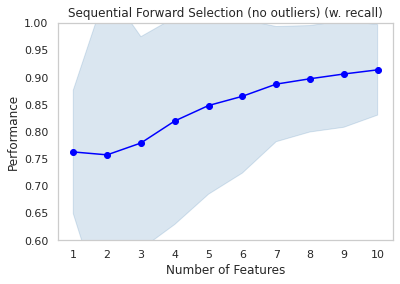

In [ ]:
# plotting
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(feature_selector_no_outliers.get_metric_dict(), kind='std_dev')
plt.ylim([0.6, 1])
plt.title('Sequential Forward Selection (no outliers) (w. recall)')
plt.grid()
plt.savefig('/content/drive/MyDrive/CDA final project/data/df_feature_selector_no_outliers_performance.png')

plt.show()

In [ ]:
df_for_print_2 = pd.DataFrame.from_dict(feature_selector_outliers.get_metric_dict()).T
img_filepath2 = '/content/drive/MyDrive/CDA final project/data/df_feature_selector_outliers.png'

html = wsp.HTML(string=df_for_print_2.to_html())
html.write_png(img_filepath2, stylesheets=[css])
trim(img_filepath2)

trim(img_filepath2)

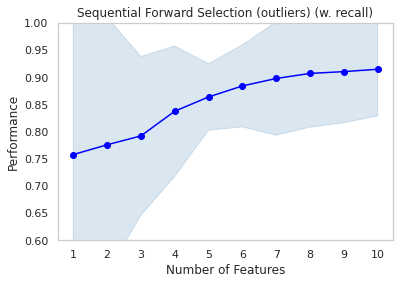

In [ ]:
# plotting
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig2 = plot_sfs(feature_selector_outliers.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1])
plt.title('Sequential Forward Selection (outliers) (w. recall)')
plt.grid()
plt.savefig('/content/drive/MyDrive/CDA final project/data/df_feature_selector_outliers_performance.png')
plt.show()

## Boruta feature selection

In [ ]:
!pip install boruta

     |████████████████████████████████| 61kB 7.3MB/s 


In [ ]:
def run_boruta(x_train, y_train):
  from sklearn.ensemble import RandomForestClassifier
  from boruta import BorutaPy

  # define the model
  clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
  # fit the model
  clf.fit(x_train, y_train)

  # define Boruta selector
  feature_selector = BorutaPy(clf, n_estimators='auto', random_state=42)
  return feature_selector.fit(x_train, y_train)


In [ ]:
# apply boruta on the dataset that doesnt have outliers
boruta_features_no_outliers = run_boruta(x_train_no_outliers_balanced, y_train_no_outliers_balanced)

for feature in list(zip(X_train.columns, boruta_features_no_outliers.ranking_, boruta_features_no_outliers.support_)):
  print('Feature: {:<30} Rank: {}, Keep: {}'.format(feature[0], feature[1], feature[2]))

Feature: age                            Rank: 1, Keep: True
Feature: education                      Rank: 1, Keep: True
Feature: sex                            Rank: 1, Keep: True
Feature: cigsPerDay                     Rank: 1, Keep: True
Feature: BPMeds                         Rank: 3, Keep: False
Feature: prevalentStroke                Rank: 4, Keep: False
Feature: prevalentHyp                   Rank: 1, Keep: True
Feature: diabetes                       Rank: 2, Keep: False
Feature: totChol                        Rank: 1, Keep: True
Feature: sysBP                          Rank: 1, Keep: True
Feature: diaBP                          Rank: 1, Keep: True
Feature: BMI                            Rank: 1, Keep: True
Feature: heartRate                      Rank: 1, Keep: True
Feature: glucose                        Rank: 1, Keep: True


In [ ]:
# apply boruta on the dataset that has outliers
boruta_features_outliers = run_boruta(x_train_outliers_balanced, y_train_outliers_balanced)

for feature in list(zip(X_train.columns, boruta_features_outliers.ranking_, boruta_features_outliers.support_)):
  print('Feature: {:<30} Rank: {}, Keep: {}'.format(feature[0], feature[1], feature[2]))

Feature: age                            Rank: 1, Keep: True
Feature: education                      Rank: 1, Keep: True
Feature: sex                            Rank: 1, Keep: True
Feature: cigsPerDay                     Rank: 1, Keep: True
Feature: BPMeds                         Rank: 1, Keep: True
Feature: prevalentStroke                Rank: 3, Keep: False
Feature: prevalentHyp                   Rank: 1, Keep: True
Feature: diabetes                       Rank: 2, Keep: False
Feature: totChol                        Rank: 1, Keep: True
Feature: sysBP                          Rank: 1, Keep: True
Feature: diaBP                          Rank: 1, Keep: True
Feature: BMI                            Rank: 1, Keep: True
Feature: heartRate                      Rank: 1, Keep: True
Feature: glucose                        Rank: 1, Keep: True


# Modeling

- Define all of the models we are going to use

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

def run_random_forest(x_train, y_train):

    # import packages
    from sklearn.ensemble import RandomForestClassifier

    # Cross Validation

    # Train Model
    clf = RandomForestClassifier()
    n_trees = list(np.arange(1,201,2))
    clf_gs = GridSearchCV(estimator=clf,
                        param_grid={'n_estimators':n_trees},
                        scoring='recall', cv=cv, n_jobs=-1)
    # Return fitted model
    return clf_gs.fit(x_train,y_train)

def run_svm(x_train, y_train):

    from sklearn.svm import SVC
    # Create Model
    clf = SVC()

    # Train Model
    clf_gs = GridSearchCV(estimator=clf,
                        param_grid={'C':[0.1,1,10,100],'gamma':['scale','auto'], 'kernel':['rbf','sigmoid']},
                        scoring='recall', cv=cv, n_jobs=-1)
    # Fit Model
    return clf_gs.fit(x_train,y_train)

def run_xgboost(x_train, y_train):
    from xgboost import XGBClassifier

    # define the model
    clf = XGBClassifier()

    # Train Model
    params = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
            }

    clf_gs = GridSearchCV(estimator=clf,
                        param_grid= params,
                        scoring='recall',cv=cv, n_jobs=-1)
    # Fit Model
    return clf_gs.fit(x_train,y_train)

def run_logit(x_train, y_train):

    from sklearn.linear_model import LogisticRegression

    # Train Model
    clf = LogisticRegression()
    # C_params = np.linspace(-4, 4, 20)
    # C_params = np.linspace(0.001, 10, 40)
    C_params = np.linspace(0.001, 2, 100)
    clf_gs = GridSearchCV(estimator=clf,
                            param_grid={'penalty':['l1','l2'],'C':C_params},
                            scoring='recall', cv=cv, n_jobs=-1)
    # Fit Model
    return clf_gs.fit(x_train,y_train)

def run_neural_net(x_train, y_train):
  from sklearn.neural_network import MLPClassifier
  # parameters = {'solver': ['lbfgs'], 'max_iter': [10000], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(10, 40), 'activation': ['logistic', 'relu'], 
  #'learning_rate_init' : [0.03, 0.04, 0.05, 0.09, 0.1, 0.5]}
  parameters = {'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(10, 40), 'activation': ['logistic', 'relu'], 'learning_rate_init' : [0.05]}
  
  clf = MLPClassifier()
  clf_grid = GridSearchCV(clf, parameters, cv=cv, n_jobs=-1)

  return clf_grid.fit(x_train,y_train)

In [ ]:
# printing all of the results
def print_accuracy(model_name, model, X_test, y_test):
    pred_y = model.predict(X_test)
    model_accuracy = np.round(accuracy_score(y_test, pred_y),4)
    cm = confusion_matrix(y_test, pred_y)
    precision,recall,fscore,support=score(y_true=y_test,y_pred=pred_y)

    print('Model results for {}'.format(model_name))
    print('Accuracy Score: {}'.format(model_accuracy))
    print('Confusion Matrix: \n {}'.format(cm))
    
    class_list = [x for x in range(0, 2)]
    data_dict = {'Class':class_list,'Precision':precision,'Recall':recall,'F-1 Score':fscore}
    model_dataframe = pd.DataFrame(data_dict)
    if model_name == 'Neural Network Grid':
        print(pred_y.cv_results_)
    print(model_dataframe)
    print('-------------------------------')
    
    return model_dataframe

## Outlier Modeling

### Full Set

- Random Forest

In [ ]:
# Run  Model
rf_model_of = run_random_forest(x_train_outliers_full, np.ravel(y_train_outliers_balanced))

# Print Results
rf_outlier_full = print_accuracy('Random Forest: Outlier: Full', rf_model_of, x_validation_outliers_full, y_validation_outliers)

Model results for Random Forest: Outlier: Full
Accuracy Score: 0.8112
Confusion Matrix: 
 [[525  56]
 [ 72  25]]
   Class  Precision    Recall  F-1 Score
0      0   0.879397  0.903614   0.891341
1      1   0.308642  0.257732   0.280899
-------------------------------


- SVM

In [ ]:
# Run Model
svm_model_of = run_svm(x_train_outliers_full, np.ravel(y_train_outliers_balanced))

# Print Results
svm_outlier_full = print_accuracy('SVM: Outlier: Full', svm_model_of, x_validation_outliers_full, y_validation_outliers)

Model results for SVM: Outlier: Full
Accuracy Score: 0.708
Confusion Matrix: 
 [[463 118]
 [ 80  17]]
   Class  Precision    Recall  F-1 Score
0      0   0.852670  0.796902   0.823843
1      1   0.125926  0.175258   0.146552
-------------------------------


- XGBoost

In [ ]:
# run Model
xgboost_model_of = run_xgboost(x_train_outliers_full, np.ravel(y_train_outliers_balanced))

# Print Results
xgb_outlier_full = print_accuracy('XGBoost: Outlier: Full', xgboost_model_of, x_validation_outliers_full, y_validation_outliers)

Model results for XGBoost: Outlier: Full
Accuracy Score: 0.8112
Confusion Matrix: 
 [[524  57]
 [ 71  26]]
   Class  Precision    Recall  F-1 Score
0      0   0.880672  0.901893   0.891156
1      1   0.313253  0.268041   0.288889
-------------------------------


- Logistic Regression

In [ ]:
# Run model
logit_model_of = run_logit(x_train_outliers_full, np.ravel(y_train_outliers_balanced))

# Print Results
logit_outlier_full = print_accuracy('Logistic Regression: Outliers: Full', logit_model_of, x_validation_outliers_full, y_validation_outliers)


Model results for Logistic Regression: Outliers: Full
Accuracy Score: 0.6976
Confusion Matrix: 
 [[410 171]
 [ 34  63]]
   Class  Precision    Recall  F-1 Score
0      0   0.923423  0.705680   0.800000
1      1   0.269231  0.649485   0.380665
-------------------------------


- Neural Nets

In [ ]:
# # Run model
# nn_model_of = run_neural_net(x_train_outliers_full, np.ravel(y_train_outliers_balanced))

# # Print Results
# neural_net_outlier_full = print_accuracy('Neural Nets: Outliers: Full', nn_model_of, x_validation_outliers_full, y_validation_outliers)

### Subset

In [ ]:
# Run Model
rf_model_os = run_random_forest(x_train_outliers_subset, np.ravel(y_train_outliers_balanced))

# Print Results
rf_outlier_subset = print_accuracy('Random Forest: Outlier: Subset', rf_model_os, x_validation_outliers_subset, y_validation_outliers)

Model results for Random Forest: Outlier: Subset
Accuracy Score: 0.7625
Confusion Matrix: 
 [[479 102]
 [ 59  38]]
   Class  Precision    Recall  F-1 Score
0      0   0.890335  0.824441   0.856122
1      1   0.271429  0.391753   0.320675
-------------------------------


- SVM

In [ ]:
# Run Model
svm_model_os = run_svm(x_train_outliers_subset, np.ravel(y_train_outliers_balanced))

# Print Results
svm_outlier_subset = print_accuracy('SVM: Outlier: Subset', svm_model_os, x_validation_outliers_subset, y_validation_outliers)

Model results for SVM: Outlier: Subset
Accuracy Score: 0.674
Confusion Matrix: 
 [[412 169]
 [ 52  45]]
   Class  Precision    Recall  F-1 Score
0      0   0.887931  0.709122   0.788517
1      1   0.210280  0.463918   0.289389
-------------------------------


- XGBoost

In [ ]:
# Run Model
xgboost_model_os = run_xgboost(x_train_outliers_subset, np.ravel(y_train_outliers_balanced))

# Print Results
xgb_outlier_subset = print_accuracy('XGBoost: Outlier: Subset', xgboost_model_os,x_validation_outliers_subset, y_validation_outliers)

Model results for XGBoost: Outlier: Subset
Accuracy Score: 0.8024
Confusion Matrix: 
 [[510  71]
 [ 63  34]]
   Class  Precision    Recall  F-1 Score
0      0   0.890052  0.877797   0.883882
1      1   0.323810  0.350515   0.336634
-------------------------------


- Logistic Regression

In [ ]:
# Run Model
logit_model_os = run_logit(x_train_outliers_subset, np.ravel(y_train_outliers_balanced))

# Print Results
logit_outlier_subset = print_accuracy('Logistic Regression: Outliers: Subset', logit_model_os, x_validation_outliers_subset, y_validation_outliers)

Model results for Logistic Regression: Outliers: Subset
Accuracy Score: 0.6976
Confusion Matrix: 
 [[409 172]
 [ 33  64]]
   Class  Precision    Recall  F-1 Score
0      0   0.925339  0.703959   0.799609
1      1   0.271186  0.659794   0.384384
-------------------------------


- Neural Nets

In [ ]:
# # Run Model
# nn_model_os = run_neural_net(x_train_outliers_subset, np.ravel(y_train_outliers_balanced))

# # Print Results
# neural_net_outlier_subset = print_accuracy('Neural Nets: Outliers: Subset', nn_model_os, x_validation_outliers_subset, y_validation_outliers)

## Non-Outlier Modeling


### Full Set

- Random Forest

In [ ]:
# Run Model
rf_model_nof = run_random_forest(x_train_no_outliers_full, np.ravel(y_train_no_outliers_balanced))

# Print Results
rf_no_outlier_full = print_accuracy('Random Forest: No-Outlier: Full', rf_model_nof, x_validation_no_outliers_full, y_validation_outliers)

Model results for Random Forest: No-Outlier: Full
Accuracy Score: 0.8083
Confusion Matrix: 
 [[525  56]
 [ 74  23]]
   Class  Precision    Recall  F-1 Score
0      0   0.876461  0.903614   0.889831
1      1   0.291139  0.237113   0.261364
-------------------------------


- SVM

In [ ]:
# Run Model
svm_model_nof = run_svm(x_train_no_outliers_full, np.ravel(y_train_no_outliers_balanced))

# Print Results
svm_no_outlier_full = print_accuracy('SVM: No-Outlier: Full', svm_model_nof, x_validation_no_outliers_full, y_validation_outliers)


Model results for SVM: No-Outlier: Full
Accuracy Score: 0.7316
Confusion Matrix: 
 [[481 100]
 [ 82  15]]
   Class  Precision    Recall  F-1 Score
0      0   0.854352  0.827883   0.840909
1      1   0.130435  0.154639   0.141509
-------------------------------


- XGBoost

In [ ]:
# Run Model
xgboost_model_nof = run_xgboost(x_train_no_outliers_full, np.ravel(y_train_no_outliers_balanced))

# Print Results
xgb_no_outlier_full = print_accuracy('XGBoost: No-Outlier: Full', xgboost_model_nof, x_validation_no_outliers_full, y_validation_outliers)



Model results for XGBoost: No-Outlier: Full
Accuracy Score: 0.8068
Confusion Matrix: 
 [[522  59]
 [ 72  25]]
   Class  Precision    Recall  F-1 Score
0      0   0.878788  0.898451   0.888511
1      1   0.297619  0.257732   0.276243
-------------------------------


- Logistic Regression

In [ ]:
# Run Model
logit_model_nof = run_logit(x_train_no_outliers_full, np.ravel(y_train_no_outliers_balanced))

# Print Results
logit_no_outlier_full = print_accuracy('Logistic Regression: No-Outliers: Full', logit_model_nof, x_validation_no_outliers_full, y_validation_outliers)


Model results for Logistic Regression: No-Outliers: Full
Accuracy Score: 0.674
Confusion Matrix: 
 [[394 187]
 [ 34  63]]
   Class  Precision    Recall  F-1 Score
0      0   0.920561  0.678141   0.780971
1      1   0.252000  0.649485   0.363112
-------------------------------


- Neural Nets

In [ ]:
# # Run Model
# nn_model_nof = run_neural_net(x_train_no_outliers_full, np.ravel(y_train_no_outliers_balanced))

# # Print Results
# neural_net_no_outlier_full = print_accuracy('Neural Nets: No Outliers: Full', nn_model_nof, x_validation_no_outliers_full, y_validation_outliers)

### Subset

In [ ]:
# Run Model
rf_model_nos = run_random_forest(x_train_no_outliers_subset, np.ravel(y_train_no_outliers_balanced))

# Print Results
rf_outlier_subset = print_accuracy('Random Forest: No-Outlier: Subset', rf_model_nos, x_validation_no_outliers_subset, y_validation_outliers)

Model results for Random Forest: No-Outlier: Subset
Accuracy Score: 0.767
Confusion Matrix: 
 [[488  93]
 [ 65  32]]
   Class  Precision    Recall  F-1 Score
0      0   0.882459  0.839931   0.860670
1      1   0.256000  0.329897   0.288288
-------------------------------


- SVM

In [ ]:
# Run Model
svm_model_nos = run_svm(x_train_no_outliers_subset, np.ravel(y_train_no_outliers_balanced))

# Print Results
svm_no_outlier_subset = print_accuracy('SVM: No-Outlier: Subset', svm_model_nos, x_validation_no_outliers_subset, y_validation_outliers)

Model results for SVM: No-Outlier: Subset
Accuracy Score: 0.6799
Confusion Matrix: 
 [[422 159]
 [ 58  39]]
   Class  Precision    Recall  F-1 Score
0      0   0.879167  0.726334   0.795476
1      1   0.196970  0.402062   0.264407
-------------------------------


- XGBoost

In [ ]:
# Run Model
xgboost_model_nos = run_xgboost(x_train_no_outliers_subset, np.ravel(y_train_no_outliers_balanced))

# Print Results
xgb_no_outlier_subset = print_accuracy('XGBoost: No-Outlier: Subset', xgboost_model_nos,x_validation_no_outliers_subset, y_validation_outliers)



Model results for XGBoost: No-Outlier: Subset
Accuracy Score: 0.8156
Confusion Matrix: 
 [[521  60]
 [ 65  32]]
   Class  Precision    Recall  F-1 Score
0      0   0.889078  0.896730   0.892888
1      1   0.347826  0.329897   0.338624
-------------------------------


- Logistic Regression

In [ ]:
# Run Model
logit_model_nos = run_logit(x_train_no_outliers_subset, np.ravel(y_train_no_outliers_balanced))

# Print Results
logit_no_outlier_subset = print_accuracy('Logistic Regression: No-Outliers: Subset', logit_model_nos, x_validation_no_outliers_subset, y_validation_outliers)

Model results for Logistic Regression: No-Outliers: Subset
Accuracy Score: 0.6903
Confusion Matrix: 
 [[402 179]
 [ 31  66]]
   Class  Precision    Recall  F-1 Score
0      0   0.928406  0.691910   0.792899
1      1   0.269388  0.680412   0.385965
-------------------------------


- Neural Nets

In [ ]:
# # Run Model
# nn_model_nos = run_neural_net(x_train_no_outliers_subset, np.ravel(y_train_no_outliers_balanced))

# # Print Results
# neural_net_no_outlier_subset = print_accuracy('Neural Nets: No Outliers: Subset', nn_model_nos, x_validation_no_outliers_subset, y_validation_outliers)

# Evaluation

-  Apply the best model to the testing set

In [ ]:
def print_results(model_name, model, X_test, y_test):
    pred_y = model.predict(X_test)
    model_accuracy = np.round(accuracy_score(y_test, pred_y),4)
    precision,recall,fscore,support=score(y_true=y_test,y_pred=pred_y)

    print('Model results for {}'.format(model_name))
    print('Accuracy Score: {}'.format(model_accuracy))
    
    class_list = [x for x in range(0, 2)]
    data_dict = {'Class':class_list,'Precision':precision,'Recall':recall,'F-1 Score':fscore}
    model_dataframe = pd.DataFrame(data_dict)
    print(model_dataframe)
    print('-------------------------------------------------------------------')
    
    return model_dataframe

#==================== the outlier/no outlier vs full/subset only applies to the dataset that the model was trained on ===============#
# outliers - fullset
# Print Results
logit_outlier_full = print_results('Logistic Regression: Outliers: Full', logit_model_of, scaled_X_test_no_outliers, y_test)

# outliers subset
x_test_os = scaled_X_test_no_outliers[:, outlier_feature_indx]
# Print Results
logit_outlier_subset = print_results('Logistic Regression: Outliers: Subset', logit_model_os, x_test_os, y_test)

# no outliers full
# Print Results
logit_no_outlier_full = print_results('Logistic Regression: No-Outliers: Full', logit_model_nof, scaled_X_test_no_outliers, y_test)

# no outliers subset
# Print Results
x_test_nos = scaled_X_test_no_outliers[:, no_outlier_feature_indx]
logit_no_outlier_subset = print_results('Logistic Regression: No-Outliers: Subset', logit_model_nos, x_test_nos, y_test)

Model results for Logistic Regression: Outliers: Full
Accuracy Score: 0.6703
   Class  Precision    Recall  F-1 Score
0      0   0.917160  0.672451   0.775970
1      1   0.263415  0.658537   0.376307
-------------------------------------------------------------------
Model results for Logistic Regression: Outliers: Subset
Accuracy Score: 0.6648
   Class  Precision    Recall  F-1 Score
0      0   0.913947  0.668113   0.771930
1      1   0.257282  0.646341   0.368056
-------------------------------------------------------------------
Model results for Logistic Regression: No-Outliers: Full
Accuracy Score: 0.6722
   Class  Precision    Recall  F-1 Score
0      0   0.917404  0.674620   0.777500
1      1   0.264706  0.658537   0.377622
-------------------------------------------------------------------
Model results for Logistic Regression: No-Outliers: Subset
Accuracy Score: 0.6648
   Class  Precision    Recall  F-1 Score
0      0   0.913947  0.668113   0.771930
1      1   0.257282  0.6463

- Plot the ROC curve for each logistic regression model built

In [ ]:
## plot ROC curve
def plot_roc(model, x_test, y_test):
  y_pred_proba = model.predict_proba(x_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)

  #create ROC curve
  lw = 2
  plt.plot(fpr,tpr,lw=lw, label='ROC curve (area = %0.2f)' %auc, color='darkorange')
  plt.legend(loc=4)
  plt.show()

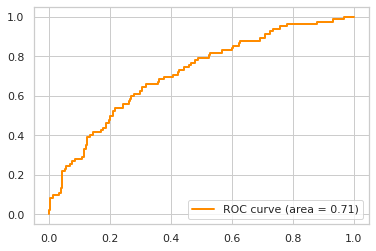

In [ ]:
# outliers - fullset
plot_roc(logit_model_of, scaled_X_test_no_outliers, y_test)

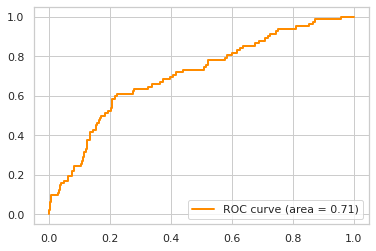

In [ ]:
# outliers subset
plot_roc(logit_model_os, x_test_os, y_test)

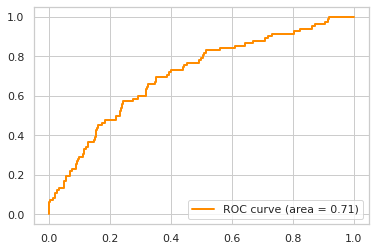

In [ ]:
# no outliers full
plot_roc(logit_model_nof, scaled_X_test_no_outliers, y_test)

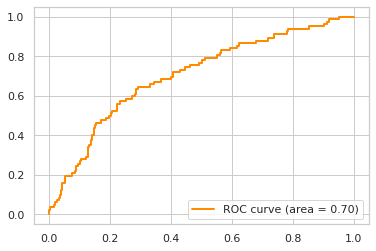

In [ ]:
# no outliers subset
plot_roc(logit_model_nos, x_test_nos, y_test)